In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


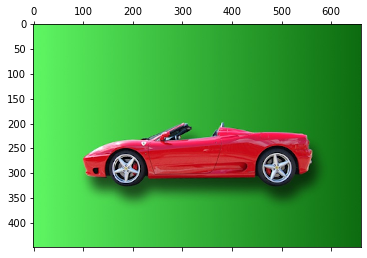

In [8]:
image = cv2.imread('images/car_green_screen2.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.matshow(image)

In HSV:
 * Hue denotes the color
 * Saturation denotes the intensity 
 * Value denotes the brightness
 

Text(0.5, 1.0, 'V channel')

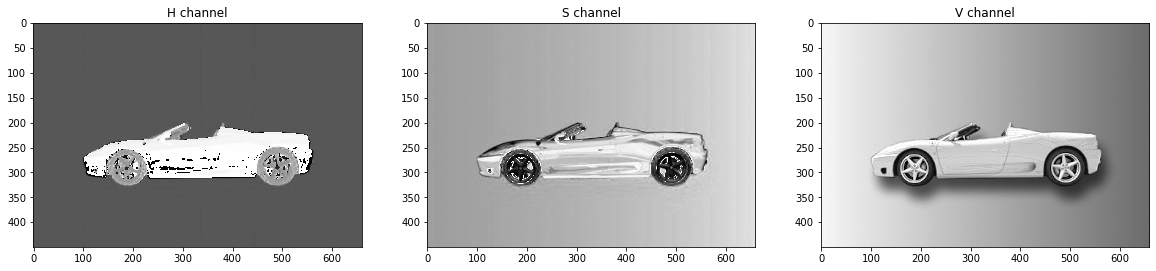

In [37]:
#Convert RGB to HSV
hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)

#Visualizing 3 channels

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))

ax1.imshow(h,cmap='gray')
ax1.set_title('H channel')
ax2.imshow(s,cmap='gray')
ax2.set_title('S channel')
ax3.imshow(v,cmap='gray')
ax3.set_title('V channel')

It is better to threshold the images using these HSV values instead of the rgb values since the HSV values control every aspect of an image including color, brightness and intensity of pixels apart from the RGB values which mainly represent the colors. 

Thresholding the images using HSV values can give us hard time.
Therefore we can use a simple trick inspired from <a href='https://answers.opencv.org/question/134248/how-to-define-the-lower-and-upper-range-of-a-color/?answer=134284#post-id-134284'>OpenCV docs</a>: 
* Note down the actual HSV values of the region to be detected
* Select <mark>[h-10, s-40, v-40]</mark> for lower range
*  <mark>[h+10, s+10, v+40]</mark> for upper range

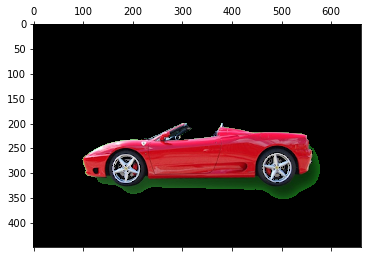

In [45]:
lower_hue = np.array([2,90,0])
upper_hue = np.array([110,255,140])

masked_image = np.copy(image)

mask = cv2.inRange(image,lower_hue,upper_hue)

masked_image[mask!=0] = [0,0,0]

plt.matshow(masked_image)